In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

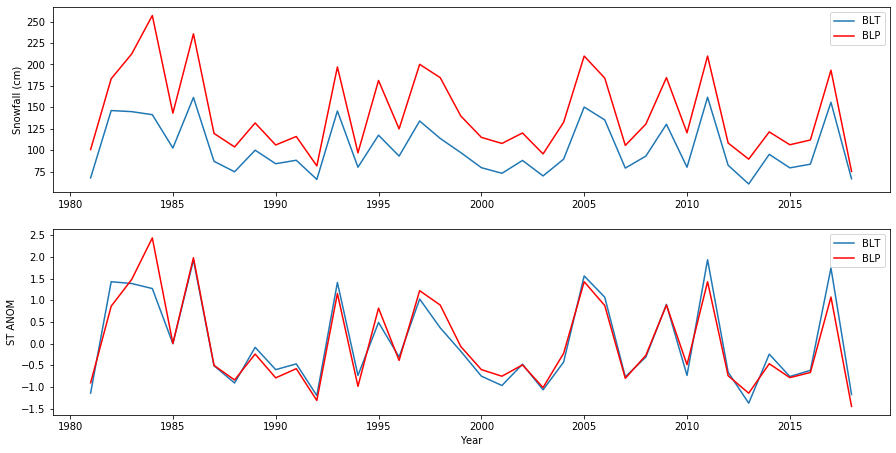

In [16]:
#Figure 4.1
#read the csv to pandas
snow = pd.read_csv("../data/snotel_wtr_yr_2018.csv", names = ['Year','TGL','BLP','BLT','FRM','PAR','TIM','PAY'])
#convert to cm
snow = snow.apply(lambda x: x*2.54 if x.name in ['TGL','BLP','BLT','FRM','PAR','TIM','PAY'] else x)
#plot totals
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow['Year'],snow['BLT'],label='BLT')
ax1.plot(snow['Year'],snow['BLP'],color='red',label='BLP')
ax1.set_ylabel('Snowfall (cm)')
ax1.legend()

#match notes - set BLT and BLP to x and y
x = snow['BLT']
y = snow['BLP']

#get means
xm = np.mean(x)
ym = np.mean(y)

#get st devs
xs = np.std(x)
ys = np.std(y)

#get anomalies
xprime = x - xm
yprime = y - ym

#standardize anomalies
xstar = xprime/xs
ystar = yprime/ys

#plot anomalies
ax2.plot(snow['Year'],xstar,label='BLT')
ax2.plot(snow['Year'],ystar,label='BLP',color='red')
ax2.legend()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')

plt.show()

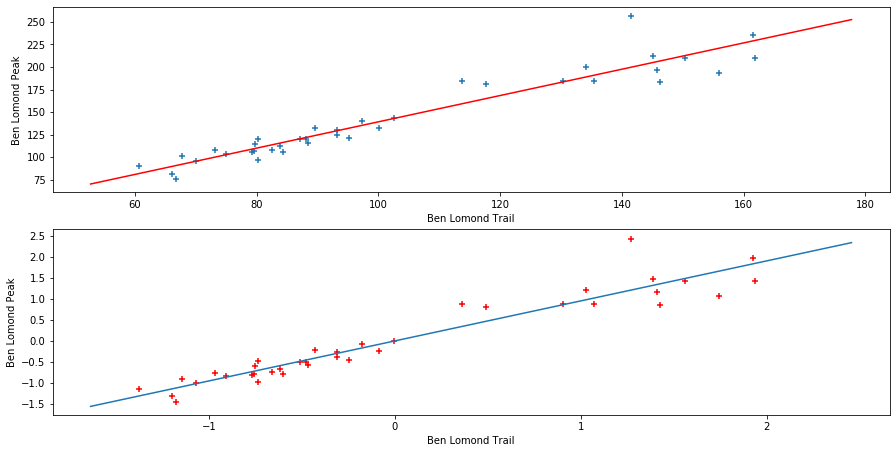

In [25]:
#Brute force regression
covar_1 = 0
varx_1 = 0
vary_1 = 0
n = len(snow)
for i in range(0,n):
    covar_1 = covar_1 + xprime[i]*yprime[i]
    varx_1 = varx_1 + xprime[i]*xprime[i]
    vary_1 = vary_1 + yprime[i]*yprime[i]

covar_1 = covar_1/n
varx_1 = varx_1/n
vary_1 = vary_1/n

b_1 = covar_1/varx_1
r_1 = covar_1/np.sqrt(varx_1*vary_1)
sdx_1 = np.sqrt(varx_1)
sdy_1 = np.sqrt(vary_1)

#using linear algebra
covar_2 = np.dot(xprime,yprime)
varx_2 = np.dot(xprime,xprime)
vary_2 = np.dot(yprime,yprime)
covar_2 = covar_2/n
varx_2 = varx_2/n
vary_2 = vary_2/n

b_2 = covar_2/varx_2
r_2 = covar_2/np.sqrt(varx_2*vary_2)
sdx_2 = np.sqrt(varx_2)
sdy_2 = np.sqrt(vary_2)

#compute estimate of y over range of x's
xhat = np.linspace(-50,75,100)
yhat = b_2*xhat

XH = xm+xhat
YH = ym+yhat

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.scatter(x,y,marker='+')
ax1.plot(XH,YH,color='red')
ax1.set_xlabel('Ben Lomond Trail')
ax1.set_ylabel('Ben Lomond Peak')
ax2.scatter(xstar,ystar,marker='+',color='red')
ax2.plot(xhat/xs,yhat/ys)
ax2.set_xlabel('Ben Lomond Trail')
ax2.set_ylabel('Ben Lomond Peak')
plt.show()

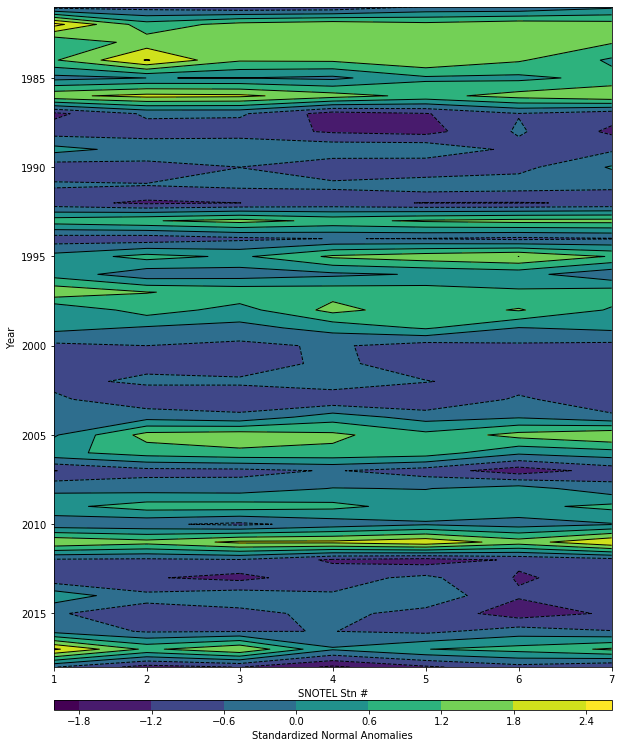

In [106]:
#Figure 6 - hovmuller diagram of standardized temporal anomalies

xt = snow.drop('Year',axis=1)
xtm = xt.mean(axis=0)
xts = np.std(xt)


no=7

#anomalies
xtp = pd.DataFrame()
for col in list(xt.columns):
    xtp[col] = xt[col].apply(lambda x : x - xtm[col])

#standardized anomalies
xstar  = pd.DataFrame()
for col in list(xtp.columns):
    xstar[col] = xtp[col].apply(lambda x : x/xts[col])

fig,ax = plt.subplots(figsize=(10,15))
ax.invert_yaxis()
cf = ax.contourf(np.arange(1,no+1,1),snow['Year'],xstar,extend='both')
cs = ax.contour(np.arange(1,no+1,1),snow['Year'],xstar,colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
ax.set_xlabel('SNOTEL Stn #')
ax.set_ylabel('Year')

cbar.set_label('Standardized Normal Anomalies')
plt.show()